In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_path = "data/Thrombin/thrombin_train.csv"
df = pd.read_csv(train_path)
df.head()

,I,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.138529,0.138530,0.138531,0.138532,0.138533,0.138534,0.138535,0.138536,0.138537,0.138538
0,I,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,I,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,I,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,I,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,I,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.I.value_counts()

I    1866
A      42
Name: I, dtype: int64

In [68]:
df.shape

(1908, 139352)

# First we do the Logisitic Regression for the thrombin data set

In [10]:
x = df.drop(columns=["I"])
y = df.I

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

In [14]:
y_train.value_counts()

I    1492
A      34
Name: I, dtype: int64

In [15]:
y_test.value_counts()

I    374
A      8
Name: I, dtype: int64

In [53]:
%%time
reg_model = LogisticRegression(random_state=0)
reg_model.fit(X_train, y_train);

Wall time: 28 s


LogisticRegression(random_state=0)


Metrics for test set with Logistic Regression

Accuracy:  0.984
Precision:  1.0
Recall:  0.25
Balanced accuracy:  0.625
Wall time: 3.9 s


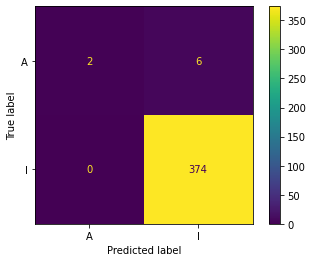

In [70]:
%%time
y_predicted = reg_model.predict(X_test)
get_metrics("Metrics for test set with Logistic Regression", y_test,y_predicted)
plot_confusion_matrix(reg_model, X_test, y_test);

In [63]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import plot_confusion_matrix

def get_metrics(intro_text, y_true, y_predicted):
    print("\n" + intro_text + "\n")
    print("Accuracy: ",round(accuracy_score(y_true, y_predicted),3))
    print("Precision: ",round(precision_score(y_true, y_predicted, pos_label='A'),3))
    print("Recall: ",round(recall_score(y_true, y_predicted, pos_label='A'),3))
    print("Balanced accuracy: ",round(balanced_accuracy_score(y_true, y_predicted),3))


Metrics for training set with Logistic Regression

Accuracy:  0.999
Precision:  1.0
Recall:  0.971
Balanced accuracy:  0.985
Wall time: 14.6 s


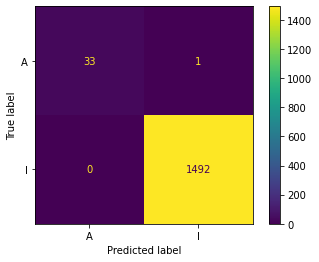

In [69]:
%%time
y_predicted = reg_model.predict(X_train)
get_metrics("Metrics for training set with Logistic Regression", y_train ,y_predicted)
plot_confusion_matrix(reg_model, X_train, y_train);

# Now we train a SVM for the thrombin data set

In [116]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [117]:
%%time
svm = SVC(kernel='linear', C=1)
svm.fit(X_train,y_train)

Wall time: 1min 10s


SVC(C=1, kernel='linear')


Metrics for test set with SVM

Accuracy:  0.984
Precision:  1.0
Recall:  0.25
Balanced accuracy:  0.625
Wall time: 38.9 s


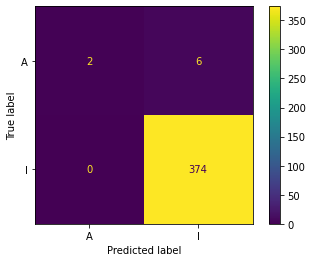

In [118]:
%%time
y_predicted = svm.predict(X_test)
get_metrics("Metrics for test set with SVM", y_test,y_predicted)
plot_confusion_matrix(svm, X_test, y_test);


Metrics for training set with SVM

Accuracy:  0.999
Precision:  1.0
Recall:  0.971
Balanced accuracy:  0.985
Wall time: 1min 21s


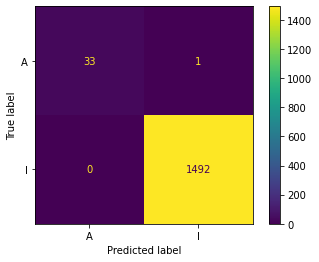

In [119]:
%%time
y_predicted = reg_model.predict(X_train)
get_metrics("Metrics for training set with SVM", y_train ,y_predicted)
plot_confusion_matrix(svm, X_train, y_train);

In [82]:
%%time
best_recall = 0
best_c = 0
c_list = [0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
recalls = []
for c in c_list:
    model = SVC(kernel='linear', C=c)
    model.fit(X_train,y_train)
    y_predicted = model.predict(X_test)
    r = recall_score(y_test, y_predicted, pos_label='A')
    recalls.append(r)
    if r > best_recall:
        best_recall = r
        best_c = c

Wall time: 13min 12s


In [83]:
best_recall

0.25

In [84]:
best_c

0.01

Text(0.5, 1.0, 'Recall in test set vs. C in SVM')

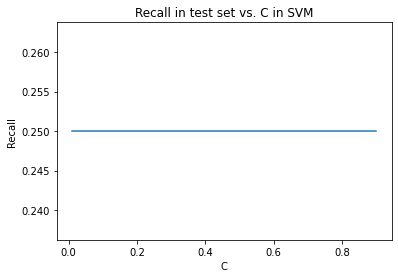

In [86]:
plt.plot(c_list,recalls)
plt.xlabel("C")
plt.ylabel("Recall")
plt.title("Recall in test set vs. C in SVM")

In [87]:
%%time
best_recall = 0
best_k = ''
k_list = ['linear', 'poly', 'rbf', 'sigmoid']
recalls = []
for k in k_list:
    model = SVC(kernel=k)
    model.fit(X_train,y_train)
    y_predicted = model.predict(X_test)
    r = recall_score(y_test, y_predicted, pos_label='A')
    recalls.append(r)
    if r > best_recall:
        best_recall = r
        best_k = k

Wall time: 7min 44s


In [88]:
best_recall

0.25

In [89]:
best_k

'linear'

Text(0.5, 1.0, 'Recall in test set vs. kernel in SVM')

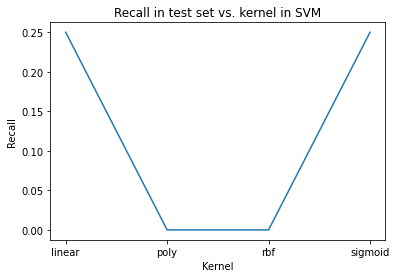

In [92]:
plt.plot(k_list,recalls)
plt.xlabel("Kernel")
plt.ylabel("Recall")
plt.title("Recall in test set vs. kernel in SVM")

# Now we train a Random Forest for the thrombin data set

In [120]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
%%time
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

Wall time: 36.3 s


RandomForestClassifier(random_state=0)


Metrics for test set with Random forest with 10,000 trees

Accuracy:  0.984
Precision:  1.0
Recall:  0.25
Balanced accuracy:  0.625
Wall time: 2.88 s


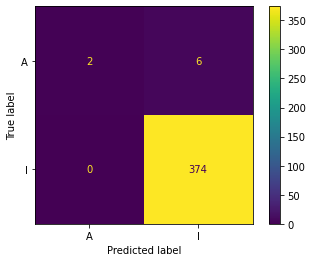

In [125]:
%%time
y_predicted = forest.predict(X_test)
get_metrics("Metrics for test set with Random forest with 10,000 trees", y_test,y_predicted)
plot_confusion_matrix(forest, X_test, y_test);


Metrics for training set with Random forest with 10,000 trees

Accuracy:  0.999
Precision:  1.0
Recall:  0.971
Balanced accuracy:  0.985
Wall time: 12.4 s


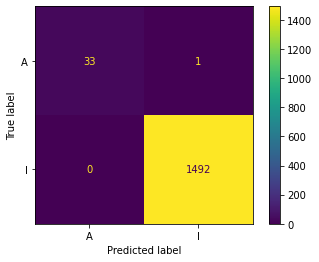

In [115]:
%%time
y_predicted = reg_model.predict(X_train)
get_metrics("Metrics for training set with Random forest with 10,000 trees", y_train ,y_predicted)
plot_confusion_matrix(forest, X_train, y_train);

Text(0.5, 1.0, 'Computation time required for fitting each model')

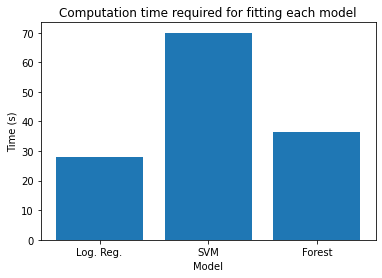

In [124]:
training_times = [28, 70, 36.3]
models = ["Log. Reg.", "SVM", "Forest"]
plt.bar(models,training_times)
plt.ylabel("Time (s)")
plt.xlabel("Model")
plt.title("Computation time required for fitting each model")

Text(0.5, 1.0, 'Computation time required for predicting with each model')

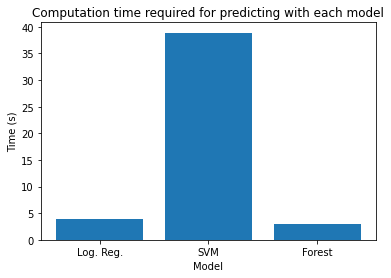

In [127]:
prediction_times = [3.9, 38.9, 2.88]
models = ["Log. Reg.", "SVM", "Forest"]
plt.bar(models,prediction_times)
plt.ylabel("Time (s)")
plt.xlabel("Model")
plt.title("Computation time required for predicting with each model")